# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

## 1. Load the Data

We will use tenflow dataset to download these images into tf.data.dataset. If you dont know about Tf.dataset. 

**What is the purpose of tf.data.dataset?**

Let say you have all these images in hard disk and you can download all these images in batches. Because there can be so many images.so if you read these images in batches into tf dataset structure. Then you can do .filter, .map , you can do amazing things 

### 1.1 Set all the Constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3  #rgb channel,
EPOCHS=50

### 1.2 Import data into tensorflow dataset object/Generates a tf.data.Dataset from image files in a directory

We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [3]:
# main_directory/
# ...class_a/
# ......a_image_1.jpg
# ......a_image_2.jpg
# ...class_b/
# ......b_image_1.jpg
# ......b_image_2.jpg

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


So our data directory is "PlantVillage", we say shuffle= True, It will randomly suffle the images and load them. I will then say image_size=??,

Let go to project folder and open the directories and if you look at the image size you see 256 by 256. All of these images are 256 by 256. You can verify that I will create couple of constants latter. So I will say my IMAGE_SIZE=256 by 256 and BATCH_SIZE = 32 , 32 is like a standard batch size. I will again stored it as a constant. 

That pretty much it i will store it 


### Class Names

In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

**Basically your folder names are your class names**

In [6]:
len(dataset)

68

Do you have any clue why its showing 68

Because evey element in the dataset is a batch of 32 images So if you do 

In [7]:
68 * 32

2176

The last batch is not perfect so it showing 2176 images but you got an idea. Lets just explore this images 

In [8]:
for image_batch, labels_batch in dataset.take(1): # take(1) gives you one batch
    print(image_batch.shape)
    print(labels_batch.numpy()) #every element is a tensor so you need to convert to numpy

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


One batch is how many images ??. There are 32 images , each image is 256 by 256 and what is this 3, basically it is the rgb channel, lets initialize CHANNELS= 3 as we have 3 images 

Label batch is [0, 1, 2]  ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

There are 3 classes and 3 images 

In [9]:
for image_batch, labels_batch in dataset.take(1): # take(1) one batch
    print(image_batch[0]) #first image
    print("*******************") # every image is a 3D-Array
    print(image_batch[0].numpy()) # every image is a 3D-Array

tf.Tensor(
[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 157. 171.]
  [165. 163. 177.]
  [168. 166. 180.]]

 [[100.  98. 109.]
  [117. 115. 126.]
  [188. 186. 199.]
  ...
  [163. 161. 175.]
  [164. 162. 176.]
  [164. 162. 176.]]

 ...

 [[142. 138. 153.]
  [120. 116. 131.]
  [136. 132. 147.]
  ...
  [180. 178. 191.]
  [178. 176. 189.]
  [189. 187. 200.]]

 [[118. 114. 129.]
  [102.  98. 113.]
  [157. 153. 168.]
  ...
  [177. 175. 188.]
  [172. 170. 183.]
  [177. 175. 188.]]

 [[123. 119. 134.]
  [128. 124. 139.]
  [148. 144. 159.]
  ...
  [205. 203. 216.]
  [188. 186. 199.]
  [173. 171. 184.]]], shape=(256, 256, 3), dtype=float32)
*******************
[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 1

In [11]:
for image_batch, labels_batch in dataset.take(1): # take(1) one batch
#     print(image_batch[0])
    print(image_batch[0].shape) #3D-Array

tf.Tensor(
[[[162. 166. 177.]
  [166. 170. 181.]
  [177. 181. 192.]
  ...
  [165. 163. 176.]
  [160. 158. 171.]
  [162. 160. 173.]]

 [[207. 211. 222.]
  [175. 179. 190.]
  [141. 145. 156.]
  ...
  [157. 155. 168.]
  [153. 151. 164.]
  [156. 154. 167.]]

 [[186. 190. 201.]
  [182. 186. 197.]
  [195. 199. 210.]
  ...
  [157. 155. 168.]
  [153. 151. 164.]
  [154. 152. 165.]]

 ...

 [[155. 153. 166.]
  [153. 151. 164.]
  [157. 155. 168.]
  ...
  [142. 139. 150.]
  [142. 139. 150.]
  [127. 124. 135.]]

 [[185. 183. 196.]
  [173. 171. 184.]
  [162. 160. 173.]
  ...
  [148. 145. 156.]
  [130. 127. 138.]
  [128. 125. 136.]]

 [[176. 174. 187.]
  [175. 173. 186.]
  [175. 173. 186.]
  ...
  [111. 108. 119.]
  [143. 140. 151.]
  [139. 136. 147.]]], shape=(256, 256, 3), dtype=float32)
(256, 256, 3)


### 1.3 Visualize some of the images from our dataset

Let's try to visualize the first image

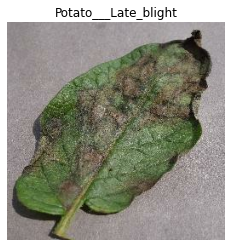

In [13]:
for image_batch, labels_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8")) # converting to integer
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")

Since suffle is True. Every time you execute it will be different.

Let's display couple of images. Out of 32 i want to display 12 images 

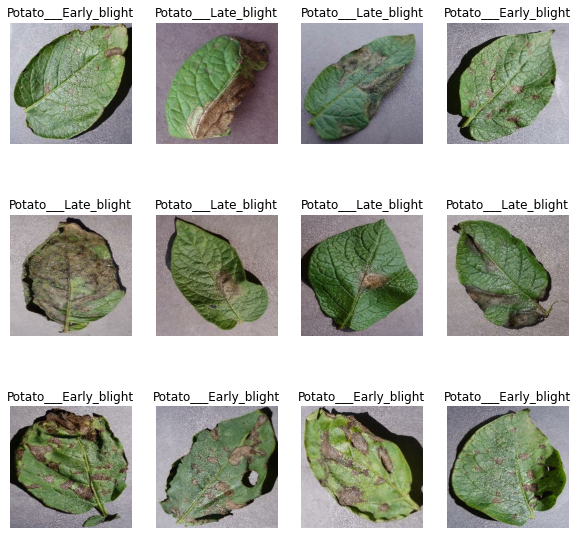

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # converting to integer
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

So everytime its suffling so you will get different image.

### 1.4 Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:

1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [16]:
len(dataset)

68

80% ==> training

20% ==> 10% validation, 10% test

This validation set will be used during the training process, when you run each epoch, after each epoch you do validation on this 10% . Lets define the EPOCHS = 50,. This is again trail and error. it can be 20, 30. Let's say we run 50 epochs and the end of every epoch we used this validation dataset to do the validation 

Once we are done through 50 epochs. Once we have final model, then we use this 10% test datasets to measure the accuracy of the model.

Before we deploy our model to into the word. we want to use this 10% test dataset to test the performance of our model. 

In [17]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [18]:
train_ds = dataset.take(54)
len(train_ds)

54

In [19]:
# temporarily we will save the remaining 20% as a test dataset but this is not exactly test dataset
test_ds = dataset.skip(54) # eqivalent in pandas [54:]
len(test_ds)

14

In [20]:
# validation size is 10%. 10% of my actual dataset 68 is 6.8
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [21]:
# get the validation dataset from the 20% temporary test data
val_ds = test_ds.take(6)
len(val_ds)

6

In [22]:
# Remove the validation data set from temporary test data 14 - 6 = 8
# Actual test data set
test_ds = test_ds.skip(6)
len(test_ds)

8

In [23]:
# function goal is to take tensorflow dataset and also take the train_split ratio, 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds)

54

In [26]:
len(val_ds)

6

In [27]:
len(test_ds)

8

## 2. Preprocessing

### 2.1 Cache, Shuffle, and Prefetch the Dataset

**Cache**: It will read the image from the disk and then for the next iteration when you select the new image. It will keep the image in the memory. This improve the performamce of your pipeline

**Prefetch**: , if your are using CPU and GPU for training. If your GPU is busy training. pre-fetch will load the next set of batch to CPU from your disk and that will improve the performance 

**tf.data.AUTOTUNE** - I am allowing tensorflow how many batches to load while GPU is training.

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### 2.1 Creating a Layer for Resizing and Normalization

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [29]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### 2.2 Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

What we do is lets say if have this original image in your training dataset. you create four new samples training samples out of that. You apply different transformation let's say horizontal flip, contrast. you see contrast is increased in this image. So You taking same image you applying some filter, some contrast, some transformation, you are generating new training samples. See here I roated the images, and now i will use all five images for my training. I have one image i have created four extra image. I used all 5 images for my training. So that my model is robust. So tomorrow when i start predicting in the real world if someone gives me roated image my model knows how to predict that. Thats the idea behind data agugmentation  

In [30]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

### 3 Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

**We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks. Watch below video to understand fundamentals of CNN**



### 3.1 Building the Model

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

softmax function normalizes the probability of your classes.

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

So this summary just print the quick summary, the parameters, these are the weights you need to train. Thats why its say trainable parameters. You know you are doing back propagations on all this weights basically, no of weights 

### 3.2 Compiling the Model

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In **deep learning** we always define the neural network architecture,

Then we do compile using We use optimers like **adam**, adam is a famous optimizer. Then you define your **loss function** SparseCategoricalCrossentropy, at last your metrics as **accuracy**. 

In each epoch what type of metric we will use to track the gradient descent basically. So the accuracy is the metrics that we use to kind of track your training process.

### 3.3 Train the Model

In [34]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 35s 315ms/step - loss: 0.8948 - accuracy: 0.4983 - val_loss: 0.8219 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 16s 291ms/step - loss: 0.6431 - accuracy: 0.7095 - val_loss: 0.7986 - val_accuracy: 0.7083
Epoch 3/50
54/54 [==============================] - 15s 278ms/step - loss: 0.3883 - accuracy: 0.8449 - val_loss: 0.5409 - val_accuracy: 0.7604
Epoch 4/50
54/54 [==============================] - 16s 295ms/step - loss: 0.2996 - accuracy: 0.8704 - val_loss: 0.1120 - val_accuracy: 0.9740
Epoch 5/50
54/54 [==============================] - 15s 286ms/step - loss: 0.1367 - accuracy: 0.9520 - val_loss: 0.0899 - val_accuracy: 0.9583
Epoch 6/50
54/54 [==============================] - 17s 321ms/step - loss: 0.1307 - accuracy: 0.9479 - val_loss: 0.1190 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 20s 366ms/step - loss: 0.1693 - accuracy: 0.9410 - val_loss: 0.1060 - val_accuracy: 0.9792

And finally the third step which is model.fit. Here you actually you train your network. We have 50 epochs, we have batch size of 32 and i will do verbose so that i can see whats going on. we have validation data as well by the way. This validation dataset will be used in each epoch. it can help you track the accuracy

By the way I will record the history of every epochs in the history parameter, so that we can do some plot. we can chart some plots. later on.

Its gonna a take some time based on what kind of computer you have some time people have you know GPUs. GPUs makes this process faster. Id you don't it may take some time. you can try with less epochs. 50 epochs is taking time. 50 may be high, you may try with less epochs 

Let me explain you all the prameters you can see here. in the first go the acuracy you got on the training data is 0.498. But the accuracy on the validation dataset is 0.55%. 

You can understand it will train your model first on training dataset. It will measure the accuracy and then it kind of running little test on. it will run little test using validation dataset and it get 55%. Then its keep running and then you will see as we have more epochs the accuracies keeps on improving and finally we have  training accuray of 99% and validation accuracy also 99.5%

### 3.4 Test the Model

In [35]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 81ms/step - loss: 0.0189 - accuracy: 0.9922


Now i will run test on my test dataset. Before you deploy your model. you want to run a test. You want to figure out how well your model performing. By trying it out on a test dataset. So that it is not biased. You model has not seen this dataset. This is the first time we are trying it. and it can give us good understanding


You can see above that we get 99% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [36]:
scores

[0.018904216587543488, 0.9921875]

If you look at the score paramter, it's a python list which has first parameter as loss. and the second parameter is accuracy. Scores is just a list containing loss and accuracy value

In [37]:
history

Now i will play with history parameters. we stored history. Let's see what this history is ?. 

It's tell me it a keras callbacks history. Immediately i will go to my friend. you know who is my friend 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

History has some parameters.


In [38]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

Its just telling me 50 epochs, 54 steps, and verbose

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

You get four parameters **'loss', 'accuracy', 'val_loss', 'val_accuracy'**. loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch.

We ran 50 epochs. So for each parameter we have 50 values. for loss we have 50 , for accuracy we have 50, validation 50 and so on and thats exactly what this is.

In [40]:
type(history.history['accuracy']) # its a python list 

list

In [41]:
len(history.history['accuracy']) #having 50 values

50

In [45]:
history.history['accuracy'][:5] # show loss for first 5 epochs

[0.4982638955116272,
 0.7094907164573669,
 0.8449074029922485,
 0.8703703880310059,
 0.9519675970077515]

In [43]:
# training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

Getting all the list stored in different variables. Then i will plot the accuracy. 

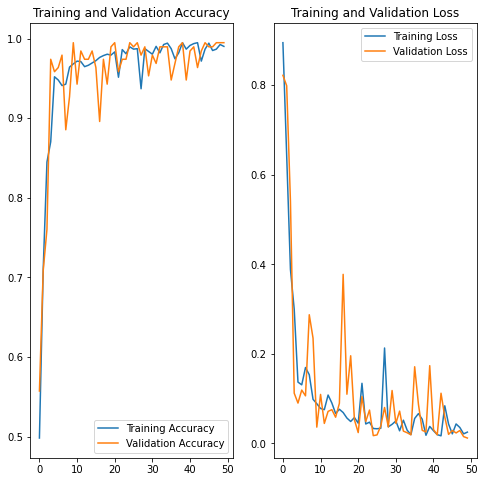

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Loss is nothing but an error in back propagation that keeps on reducing as we proceed forward in your epochs. So far it looks good. Now we want to make predictions

### 3.5 Model Prediction

#### Run prediction on a sample image

First image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 70ms/step
batch_prediction:  [1.7509151e-06 9.9999821e-01 2.2718785e-10]
Predicted Label: Potato___Late_blight


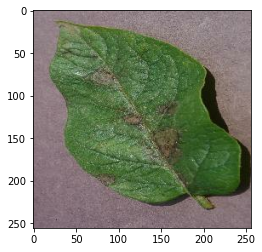

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):  # 32 images
    
    first_image = images_batch[0].numpy().astype('uint8') # take the first image
    first_label = labels_batch[0].numpy() # return the label of the image [ 0 or 1 or 2]
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch) # this will be the prediction for 32 images 
    
    print("batch_prediction: ",batch_prediction[0])
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

You may be thing why the images is changing because we are doing shuffling here. That's why image keeps on changing. My model is performing awesome see. Se we are trying different cases and its exactly telling me what is this. You see this is the power of convolutional neural network okay.

Now what i am going to do is this I am going to write a function and i am not going to go into detail. 

#### Write a function for inference

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

This is just a simple function that is taking model and image as a input and it telling you what is the predicted class and the what is the confidence. 100% confidence mean the accuracy of the prediction is 100%. so that your confidence score.

If you look at the code we converted image into an image array and then we created a batch out of it.After that we called predict function and then we figured out predicted class and then we find the confidence.

**Run the Prediction on Entire batch**

Now run inference on few sample images

1/1 [==============================] - 0s 30ms/step


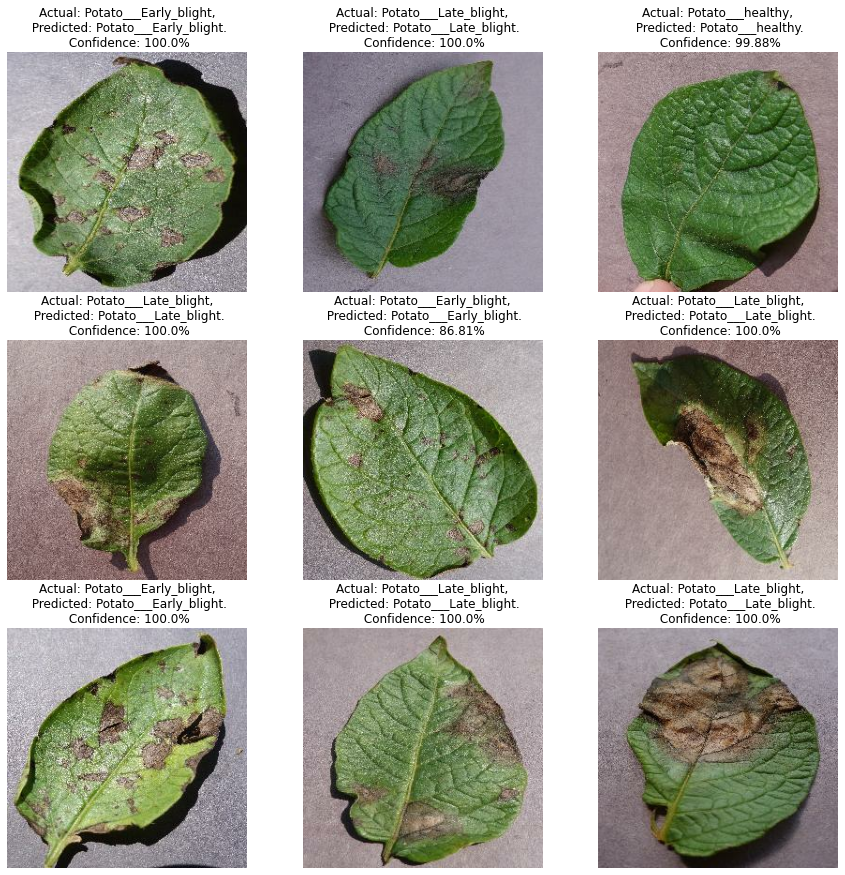

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9): #pick only 9 images 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) 
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
Confidence is high in most of the cases. This amazing folks, amazing, amazing performace indeed.

### 5. Saving the Model

We append the model to the list of models as a new version

In [ ]:
model_version=1
model.save(f"../models/{model_version}")

Now let's say you made some changes into your model and you want to save it as version 2 

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
#     data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [58]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


If you want to automatically increment the model versions. you can do that using os library

In [62]:
import os
print(os.listdir("../models"))
print([int(i) for i in os.listdir("../models")])
print(max([int(i) for i in os.listdir("../models")])+1)

['1', '2']
[1, 2]
3


In [55]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [56]:
model.save("../potatoes.h5")